<a href="https://colab.research.google.com/github/SergiiRv/first/blob/master/NEURON_Lab1_SergiiRomanenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install neuron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 31.6 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!unzip /content/drive/MyDrive/mods.zip

Archive:  /content/drive/MyDrive/mods.zip
   creating: mods/
  inflating: mods/cad.mod            
  inflating: mods/ca.mod             
  inflating: mods/kca.mod            
  inflating: mods/km.mod             
  inflating: mods/kv.mod             
  inflating: mods/na.mod             


In [6]:
!nrnivmodl mods

/content
Arg Error: "mods" is not a folder or mod file name or prefix

  Mod file, folder args: "mods"
Traceback (most recent call last):
  File "/usr/local/bin/nrnivmodl", line 114, in <module>
    subprocess.check_call([exe, *sys.argv[1:]])
  File "/usr/lib/python3.10/subprocess.py", line 369, in check_call
    raise CalledProcessError(retcode, cmd)
subprocess.CalledProcessError: Command '['/usr/local/lib/python3.10/dist-packages/neuron/.data/bin/nrnivmodl', 'mods']' returned non-zero exit status 1.


#Giant Axon


In [19]:
%matplotlib inline
from numpy import *
from numpy import random as rnd
import matplotlib.pyplot as plt
from neuron import h

import pandas as pd

In [18]:
h.dt = 0.02
h.celsius  = 6.3

In [9]:
def axon(L = 50000, D = 100, NSeg = 3000, Dly = 30, Durn = 1e9, A = 200):

  """
    Returns the sample of a simple one axon exitation recoereded in current clamp mode

    Args:
      L - length of axon
      D- diameter of axon
      NSeg = number of segments for integration and propagation

    Returns:
      V00,V05, V10 - vectors (np.array) of recorded potentialin the beggining, in the middle and at the end of the Axon
    """
  gaxon = h.Section()
  gaxon.insert('hh')
  gaxon.L = L
  gaxon.diam = D
  gaxon.nseg = NSeg

  ic= h.IClamp(0, sec = gaxon)
  ic.delay = Dly
  ic.dur = Durn
  ic.amp = A

  v00, v05, v10 = h.Vector(), h.Vector(), h.Vector()
  v00.record(gaxon(0.0)._ref_v, sec = gaxon)
  v05.record(gaxon(0.5)._ref_v, sec = gaxon)
  v10.record(gaxon(1.0)._ref_v, sec = gaxon)

  h.finitialize(-63)
  h.fcurrent()
  h.frecord_init()

  h.t = 0

  while h.t < 200 : h.fadvance()

  v00,v05, v10 =  array(v00), array(v05), array(v10)
  trec = arange(v00.shape[0])*h.dt
  return v00, v05, v10, trec


#Default case


In [ ]:
v00, v05, v10, trec = axon()

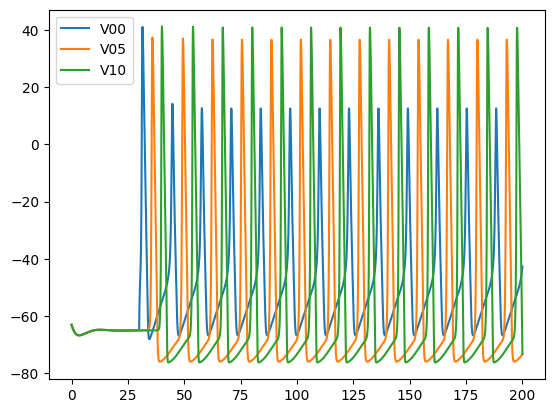

In [16]:
#v00, v05, v10, trec = axon()
plt.plot(trec, v00, "-", label="V00")
plt.plot(trec, v05, "-", label="V05")
plt.plot(trec, v10, "-", label="V10")
plt.legend()
show()

# The role of various Diameters

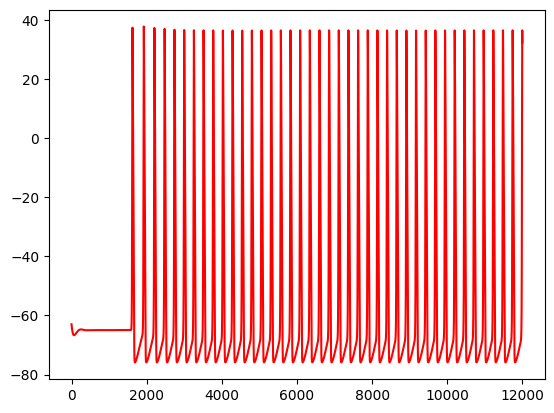

In [45]:
pdV00 =

x = np.linspace(30, 30, 300)
for X in x:
  v00, v05, v10, trec = axon(L = 50000, D = X, NSeg = 6000, Dly = 30, Durn = 1e9, A = 300)


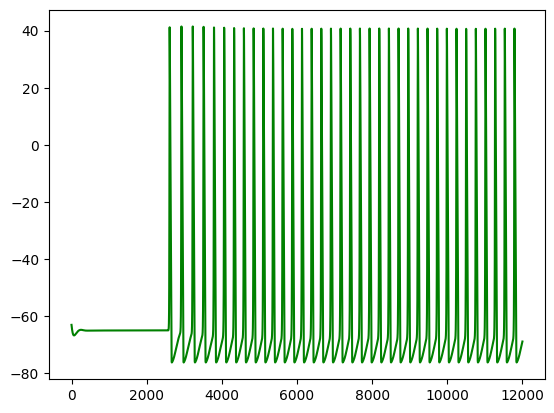

In [46]:
plot(v10, "g")